In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 100
import plotly.graph_objects as go
# import warnings
# warnings.filterwarnings("error")

In [24]:
arr = np.ones(5)
print(arr)
i = 5
np.sum(arr[4:])

[1. 1. 1. 1. 1.]


1.0

In [ ]:
T = 0.1

a = 0
b = 1

h = 0.01
tau = 0.001

M = int(T/tau) + 1
N = int((b-a)/h) + 1

K = lambda u, x, t: u**2

A = np.zeros((M, N))
Psi = np.ones(N-1)
Q = np.zeros(N)

Psis = [Psi.copy()]

for n in range(N):
    A[0][n] = np.sin(n*h)

for m in range(1, M):
    # tau = 0.001
    for n in range(1, N - 1):
        Q[0] = 0
        for i in range(1, N - 1):
            # if np.abs(A[m-1][i+1] - A[m-1][i-1]) < 0.01 or np.abs(Psi[i]+Psi[i-1]) < 0.01:
            #     Q[i] = (K(A[m-1][i+1], h*(i+1), tau*(m-1))*(A[m-1][i+1] - A[m-1][i]) - \
            #             K(A[m-1][i-1], h*(i-1), tau*(m-1))*(A[m-1][i] - A[m-1][i-1])) * \
            #             2/h/0.01/ 0.01
            # else:
            #     try:
            #         Q[i] = (K(A[m-1][i+1], h*(i+1), tau*(m-1))*(A[m-1][i+1] - A[m-1][i]) - \
            #                 K(A[m-1][i-1], h*(i-1), tau*(m-1))*(A[m-1][i] - A[m-1][i-1])) * \
            #                 2/h/(Psi[i]+Psi[i-1])/(A[m-1][i+1] - A[m-1][i-1])
            #     except:
            #         pass
            # if Psi[i-1] + tau/h*(Q[i-1]-Q[i]) < 0:
            #     Q[i] = h/tau*Psi[i-1]/2 + Q[i-1]
            # else:
            #     Q[i] += h/tau*Psi[i-1]/2 + Q[i-1]
            # counted = (K(A[m-1][i+1], h*(i+1), tau*(m-1))*(A[m-1][i+1] - A[m-1][i]) - \
            #                 K(A[m-1][i-1], h*(i-1), tau*(m-1))*(A[m-1][i] - A[m-1][i-1])) * \
            #                 2/h/(Psi[i]+Psi[i-1])/(A[m-1][i+1] - A[m-1][i-1])
            # right =  h/tau*np.sum(Psi[:i])
            # left = -h/tau*np.sum(Psi[i:])
            # if  left < counted < right:
            #     Q[i] = counted
            # elif counted > right:
            #     Q[i] = right/2
            # elif counted < left:
            #     Q[i] = left/2
            # Q[i] = (left+right)/2
            Q[i] = 0
        Q[N-1] = 0
        
        Psi_next = np.zeros(N-1)
        
        # taus = list()
        # for i in range(0, N-1):
        #     if Q[i] != Q[i+1]:
        #         taus.append(abs(h*Psi[i]/2/(Q[i+1] - Q[i])))
        # if len(taus) != 0:
        #     tau = min(taus)
        
        for i in range(0, N - 1):
            Psi_next[i] = Psi[i] + tau/h*(Q[i]-Q[i+1])
                
        A[m][n] = (A[m-1][n] * (Psi[n] + Psi[n-1]) / 2 + tau / h**2 * \
            (K((A[m-1][n+1] + A[m-1][n])/2, (n+1/2)*h, (m-1)*tau) / Psi[n] * (A[m-1][n+1]-A[m-1][n]) \
            - \
            K((A[m-1][n] + A[m-1][n-1])/2, (n-1/2)*h, (m-1)*tau) / Psi[n-1] * (A[m-1][n]-A[m-1][n-1])) \
            - \
            tau / (2*h) * (Q[n+1] * A[m-1][n+1] - Q[n-1]*A[m-1][n-1])) * 2 / (Psi_next[n]+Psi_next[n-1])

        Psi = np.copy(Psi_next)
        
        Psis.append(Psi.copy())
        

C:\Users\stas2\AppData\Local\Temp\ipykernel_5164\1265759984.py:12: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\stas2\AppData\Local\Temp\ipykernel_5164\1265759984.py:44: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\stas2\AppData\Local\Temp\ipykernel_5164\1265759984.py:43: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\stas2\AppData\Local\Temp\ipykernel_5164\1265759984.py:45: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\stas2\AppData\Local\Temp\ipykernel_5164\1265759984.py:71: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\stas2\AppData\Local\Temp\ipykernel_5164\1265759984.py:75: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\stas2\AppData\Local\Temp\ipykernel_5164\1265759984.py:73: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\stas2\AppData\Local\Temp\ipykernel_5164\1265759984.py:43: RuntimeWarning:

overflow encountered in

: 

: 

In [30]:
Psi

array([5., 0., 0., 0., 0., 0., 0., 0., 0., 5.])

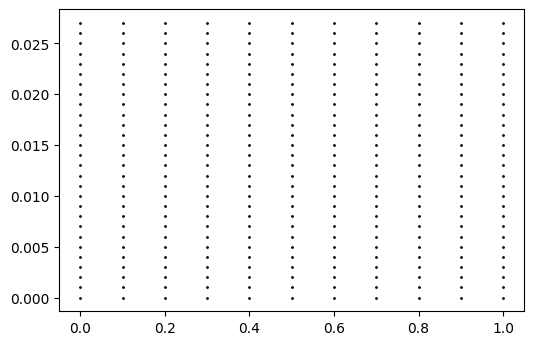

In [4]:
t = 0
for i, Psi in enumerate(Psis):
    if i % 10 == 0:
        X = list()
        xi = 0
        X.append(xi)
        for psi in Psi:
            xi += psi * h
            X.append(xi)
        plt.scatter(X, np.full((len(X)), t), s=1, color='black')
        t += tau
plt.show()

In [12]:
sh_0, sh_1 = A.shape
fig = go.Figure(go.Surface(
    # contours = {
    #     "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
    #     "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    # },
    x = np.linspace(a, b, sh_1),
    y = np.linspace(0, T, sh_0),
    z = A))
# fig.update_layout(
#         scene = {
#             "xaxis": {"nticks": 20},
#             "zaxis": {"nticks": 4},
#             'camera_eye': {"x": 0, "y": -1, "z": 0.5},
#             "aspectratio": {"x": 1, "y": 1, "z": 0.2}
#         })
fig.show()